In [54]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

## Information Theory

### What is the Entropy?

A neuron will fire probability 0.1, yielding a Bernoulli distribution:

$ P(F=1) = 0.1$

Entropy: $H=-\sum_{r}P[r]log_2 P[r]$

In [77]:
probs = np.array([0.9, 0.1])

In [78]:
H = -np.sum(probs*np.log2(probs)); H

0.46899559358928122

### What is the Mutual Information?

$$I_m=H-H_{noise}=-\sum_{r}P[r]log_2 P[r]+\sum_{s,r}P[s]P[r|s]log_2 P[r|s]$$

$P(S=1)=0.10$

$P(F=1|S=1)=1/2$

$P(F=1|S=0)=1/18$


In [91]:
probs_s = np.array([0.1, 0.1, 0.9, 0.9])
probs_r = np.array([1/2, 1/2,1/18, 1-1/18])

H_n = -np.sum(probs_s*probs_r*np.log2(probs_r))

In [92]:
H-H_n

0.090406507353988586

In [25]:
with open('./tuning_3.4.pickle', 'rb') as f:
    data = pickle.load(f)

4 different neurons has been probed with a range of air velocity stimuli of uniform intensity and differing direction.

Firing rates of each of the neurons in response to each of the stimulus values is recorded. 

Each of these recordings lasted 10 seconds and we repeated this process 100 times for each neuron-stimulus combination.

* The stimulus, that is, the direction of the air velocity, is in the vector named stim.

Each column of a neuron matrix contains the firing rate of that neuron (in Hz) in response to the corresponding stimulus value in stim. That is, nth column of neuron1 contains the 100 trials in which we applied the stimulus of value stim(n) to neuron1.

## What function best desribes the tuning curve?

Plot the tuning curve-- the mean firing rate of the neuron as a function of the stimulus-- for each of the neurons.

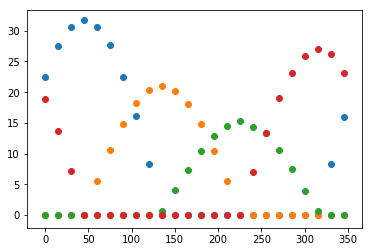

In [26]:
plt.scatter(data['stim'], np.mean(data['neuron1'], axis=0))
plt.scatter(data['stim'], np.mean(data['neuron2'], axis=0))
plt.scatter(data['stim'], np.mean(data['neuron3'], axis=0))
plt.scatter(data['stim'], np.mean(data['neuron4'], axis=0))
plt.show()

Answer: Half-wave rectified cosine

## Which of the neurons (if any) is NOT a Poisson?

In [121]:
n1 = len([*filter(lambda x: x>0, np.mean(data['neuron1'], axis=0))])/10; n1

1.1

In [122]:
n2 = len([*filter(lambda x: x>0, np.mean(data['neuron2'], axis=0))])/10; n2

1.1

In [123]:
n3 = len([*filter(lambda x: x>0, np.mean(data['neuron3'], axis=0))])/10; n3

1.4

In [124]:
n4 = len([*filter(lambda x: x>0, np.mean(data['neuron4'], axis=0))])/10; n4

1.1

Answer: Neuron 4

In [125]:
with open('./pop_coding_3.4.pickle', 'rb') as f:
    pop_data = pickle.load(f)

In [133]:
pop_data

{'c1': array([ 0.70710678,  0.70710678]),
 'c2': array([ 0.70710678, -0.70710678]),
 'c3': array([-0.70710678, -0.70710678]),
 'c4': array([-0.70710678,  0.70710678]),
 'r1': array([ 11.9,  12.8,  13.9,  12.1,  11.3,  12.2,  12.9,  12.4,  13.2,  10.7]),
 'r2': array([ 18.8,  18. ,  19. ,  19.1,  18.1,  21.5,  20.3,  21.2,  18.6,  20.4]),
 'r3': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'r4': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

Additionally, each neuron has been exposed to a single stimulus of unknown direction for 10 trials of 10 seconds each. 

Decode the neural responses and recover the mystery stimulus vector by computing the population vector for these neurons. 

* use the maximum average firing rate (over any of the stimulus values in 'tuning') for a neuron as the value of rmax for that neuron. That is, rmax should be the maximum value in the tuning curve for that neuron.

What is the direction, in degrees, of the population vector? 

You should round your answer to the nearest degree. Your answer should contain the value only (no units!) and should be between 0∘ and 360∘. If your calculations give a negative number or a number greater than or equal to 360, convert it to a number in the proper range (you may use the mod function to do this).

In [134]:
v_1 = np.sum(pop_data['r1'] / np.max(np.mean(data['neuron1'], axis=0)))* pop_data['c1']; v_1

array([ 2.75197833,  2.75197833])

In [135]:
v_2 = np.sum(pop_data['r2'] / np.max(np.mean(data['neuron2'], axis=0)))* pop_data['c2']; v_2

array([ 6.54448822, -6.54448822])

In [129]:
# np.sum(pop_data['r3'] / np.max(np.mean(data['neuron3'], axis=0)))* pop_data['c3']

In [130]:
# np.sum(pop_data['r4'] / np.max(np.mean(data['neuron4'], axis=0)))* pop_data['c4']

In [149]:
coor = np.mean([v_1, v_2], axis=0); coor

array([ 4.64823327, -1.89625495])

In [159]:
np.arctan2(coor[1], coor[0]) % 360

359.61265750824663